In [57]:
from PIL import Image

In [32]:
def nearby(img, x, y):  
    around = 0
    for c in [0, 1, 2]:
        around = img.getpixel((x - 1, y - 1))[0] + img.getpixel((x, y - 1))[0] + img.getpixel((x -1, y))[0] + img.getpixel((x + 1, y))[0] + img.getpixel((x - 1, y + 1))[0] + img.getpixel((x, y + 1))[0] + img.getpixel((x + 1, y + 1))[0]
    return around / 24.0

In [33]:
ourimage = Image.open('blur.png')
nearby(ourimage, 42, 40)

6.125

In [37]:
def differ(img, x, y):
    current = 0
    around = 0 
    for c in [0, 1, 2]:
        current = current + img.getpixel((x,y))[c]
        around = img.getpixel((x - 1, y - 1))[c] + img.getpixel((x, y - 1))[c] + img.getpixel((x -1, y))[c] + img.getpixel((x + 1, y))[c] + img.getpixel((x - 1, y + 1))[c] + img.getpixel((x, y + 1))[c] + img.getpixel((x + 1, y + 1))[c]
    return (around / 24.0) - (current / 3.0)

In [38]:
differ(ourimage, 42, 40)

-12.291666666666666

In [39]:
def blur(img):
    blurred = Image.new('RGB', img.size)
    for x in range(img.size[0]):
        for yo in range(img.size[1]):
            (r, g, b) = img.getpixel((x, y))
            change = differ(img, (x, y)) / 2.0
            blurred.putpxiel((x, y), (r + change, g + change, b + change))
        return blurred

In [72]:
def blur(img):
    blurred = Image.new('RGB', img.size, 'white')
    for x in range(1, img.size[0] - 1):
        for y in range(1, img.size[1] - 1):
            (r, g, b) = img.getpixel((x, y))
            change = differ(img, x, y) / 2.0
            change = int(round(change))
            blurred.putpixel((x, y), (r + change, g + change, b + change))
    
    blurred.save('blurred_one.png')
    
    return blurred 

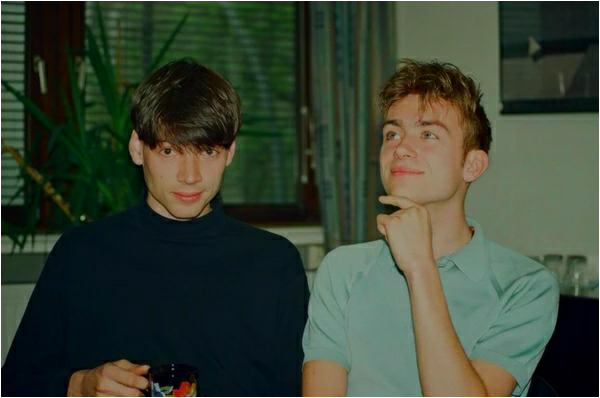

In [82]:
blur(ourimage)

In [80]:
newimage = Image.open('new.jpg')

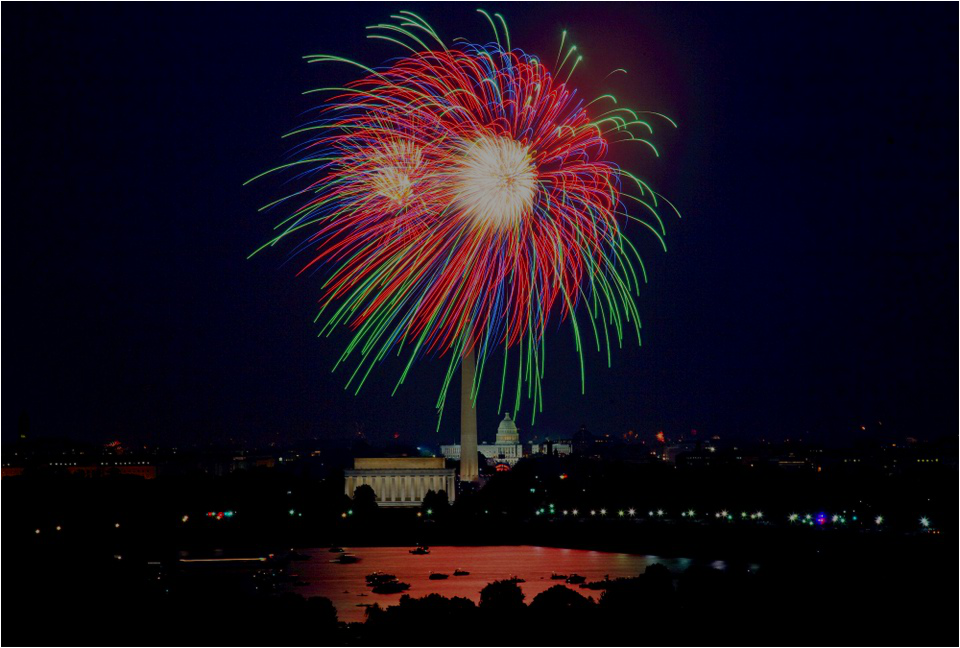

In [81]:
blur(newimage)